In [1]:
# Reimportar bibliotecas necessárias
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import binomtest
from scipy.stats import chisquare
from itertools import combinations
from scipy.stats import fisher_exact
from scipy.stats import friedmanchisquare
import warnings
warnings.filterwarnings("ignore")

### Exercicio 1
Você gosta de chocolate? 

Aqui temos um experimento onde vários indivíduos independentes deram notas para alguns chocolates.
Em cada linha da tabela temos um chocolate diferente que foi avaliado (arquivo: notas_precos.xlsx).
Bom trabalho! 

a)	Fazer uma análise descritiva das duas variáveis sozinhas.

b)	Pense em um gráfico interessante para verificar se existe alguma relação entre as notas dadas e o preço do chocolate.

c)	O que poderia ser feito para detectar se existe alguma associação?

d)	Crie as equações para chegar no chute sofisticado (ychapeu). 

        a.	Quantas equações podem ser criadas?

        b.	Descreva cada uma dessas equações

e)	Calcule SQT, SQM e SQE.

f)	Calcule R2 e interprete.

g)	Observe as equações que você criou e me conte se algo te chamou a atenção.



In [2]:
# Carregar os dados do arquivo Excel
df = pd.read_excel("notas_precos.xlsx")
df = df[['nota', 'faixa_preco']].dropna()
df['nota'] = pd.to_numeric(df['nota'], errors='coerce')
df.head()

,nota,faixa_preco
0,1.739524,g1
1,2.069823,g1
2,3.858708,g1
3,2.370508,g1
4,2.429288,g1


In [3]:
#a) Fazer uma análise descritiva das duas variáveis sozinhas.
# Análise descritiva da variável "nota"
descricao_nota = df['nota'].describe()
descricao_nota


count    600.000000
mean       6.028854
std        2.426344
min        0.333383
25%        3.907017
50%        6.452879
75%        8.133258
max        9.984031
Name: nota, dtype: float64

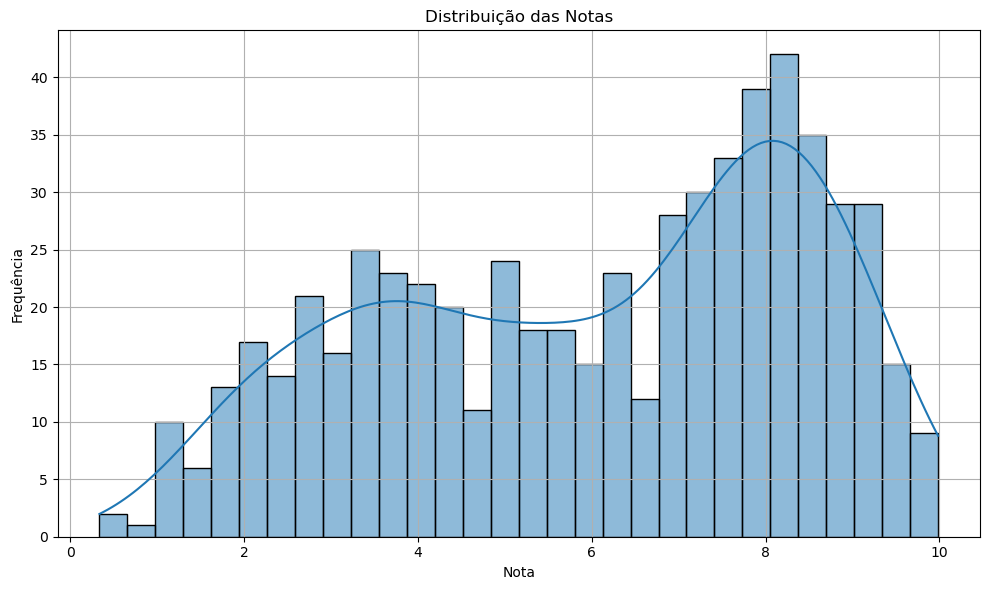

In [4]:
# Plotagem adicional
plt.figure(figsize=(10, 6))
sns.histplot(df['nota'], bins=30, kde=True)
plt.title("Distribuição das Notas")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Análise descritiva da variável "faixa_preco"
descricao_faixa = df['faixa_preco'].value_counts().sort_index()


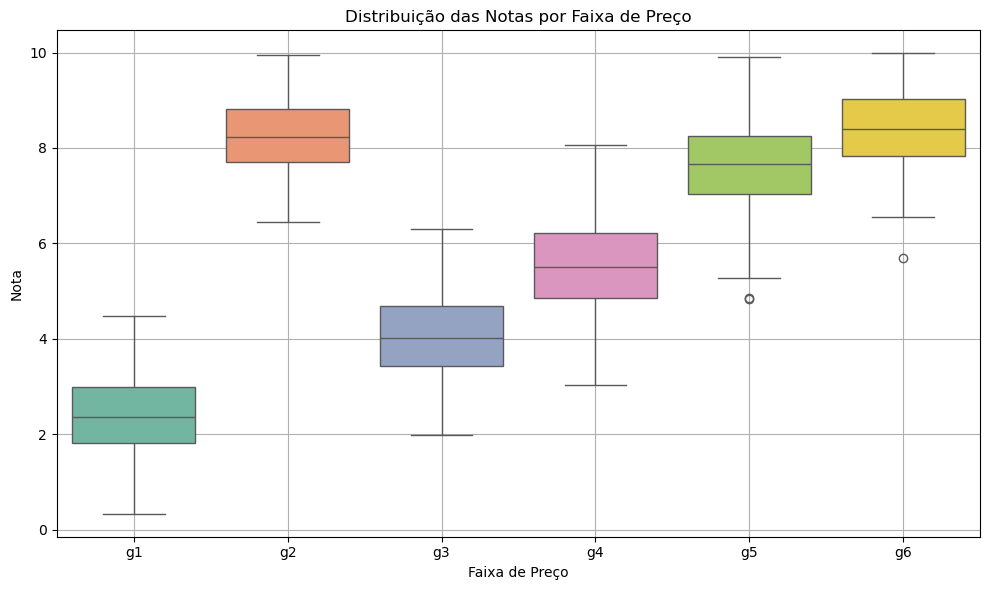

In [6]:
# b)	Pense em um gráfico interessante para verificar se existe alguma relação entre as notas dadas e o preço do chocolate.
# bGráfico de dispersão com médias por faixa_preco
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="faixa_preco", y="nota", palette="Set2")
plt.title("Distribuição das Notas por Faixa de Preço")
plt.xlabel("Faixa de Preço")
plt.ylabel("Nota")
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# c, d, e, f) Regressão linear (ANOVA) com variável categórica faixa_preco

# Criar modelo com variável categórica (one-hot encoding automático)
modelo = smf.ols('nota ~ C(faixa_preco)', data=df).fit()

In [8]:
# Obter ANOVA
anova_table = sm.stats.anova_lm(modelo, typ=2)

In [9]:
# SQT = Soma Total dos Quadrados (Total)
# SQM = Soma dos Quadrados do Modelo (entre grupos)
# SQE = Soma dos Quadrados do Erro (dentro dos grupos)
SQM = anova_table.loc["C(faixa_preco)", "sum_sq"]
SQE = anova_table.loc["Residual", "sum_sq"]
SQT = SQM + SQE
# R² = SQM / SQT
R2 = SQM / SQT

# Exibir os resultados
anova_table

,sum_sq,df,F,PR(>F)
C(faixa_preco),3023.164704,5.0,713.687865,2.272671e-248
Residual,503.233955,594.0,NaN,NaN


In [10]:
SQT

3526.3986590620916

In [11]:
SQM

3023.1647043427506

In [12]:
SQE

503.233954719341

In [13]:
R2

0.8572952171966896


3)	Um fabricante de biscoito afirma que a quantidade de calorias em cada pacotinho é de 60 cal. Para verificar se essa informação é verdadeira, uma amostra aleatória de 36 pacotinhos é coletada, observando-se que a quantidade média de calorias é de 65 cal com desvio-padrão de 3,5. Aplique o teste adequado e verifique se a informação do fabricante é verdadeira, considerando um nível de significância de 5%.


In [14]:
# Dados fornecidos
media_amostral = 65
media_hipotetica = 60
desvio_amostral = 3.5
n = 36
alpha = 0.05

In [15]:
# Estatística do teste t
t_stat = (media_amostral - media_hipotetica) / (desvio_amostral / np.sqrt(n))


In [16]:
# Graus de liberdade
df = n - 1

In [17]:
# p-valor (teste bicaudal)
p_valor = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=df))

In [18]:
# Valor crítico bilateral
t_critico = stats.t.ppf(1 - alpha / 2, df)

In [19]:
t_stat, p_valor, t_critico

(8.571428571428571, 4.0671310763684687e-10, 2.0301079282503425)

In [20]:
if abs(t_stat) > t_critico:
    print("Rejeita H0: a média observada é significativamente diferente de 60 calorias.")
else:
    print("Não rejeita H0: a média observada não é significativamente diferente de 60 calorias.")


Rejeita H0: a média observada é significativamente diferente de 60 calorias.


In [21]:
if p_valor < alpha:
    print("Rejeita H0: evidência suficiente contra a alegação do fabricante.")
else:
    print("Não rejeita H0: não há evidência suficiente contra a alegação do fabricante.")


Rejeita H0: evidência suficiente contra a alegação do fabricante.


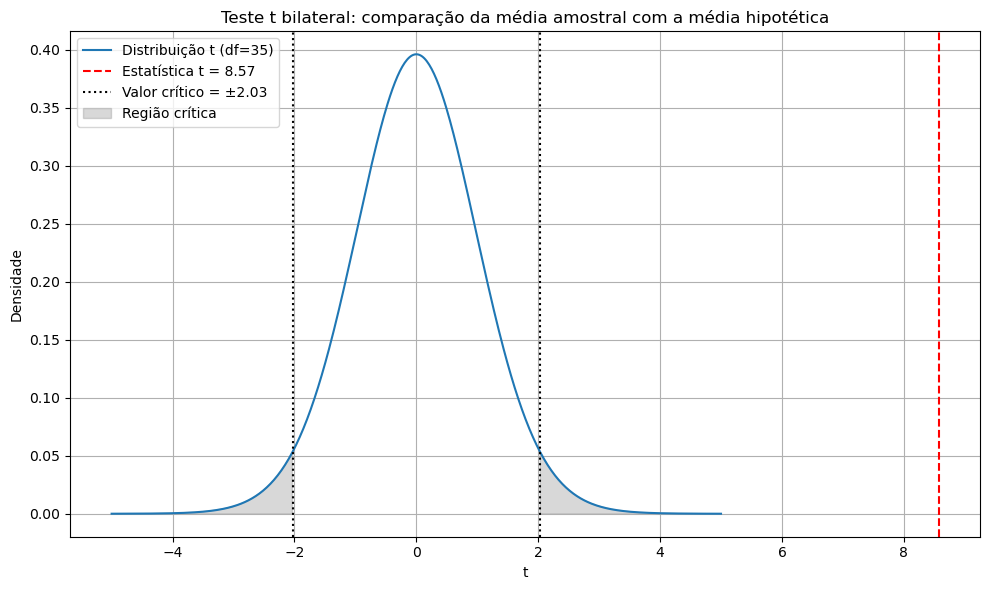

In [22]:
# Geração da curva t de Student
x = np.linspace(-5, 5, 500)
y = stats.t.pdf(x, df)

# Plotagem da curva t
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t (df=35)')
plt.axvline(t_stat, color='red', linestyle='--', label=f'Estatística t = {t_stat:.2f}')
plt.axvline(-t_critico, color='black', linestyle=':', label=f'Valor crítico = ±{t_critico:.2f}')
plt.axvline(t_critico, color='black', linestyle=':')

plt.fill_between(x, y, where=(x < -t_critico) | (x > t_critico), color='gray', alpha=0.3, label='Região crítica')
plt.title('Teste t bilateral: comparação da média amostral com a média hipotética')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


4)	Deseja-se comparar o tempo médio de espera para atendimento (min) em 2 hospitais. Para isso, coletou-se uma amostra com 20 pacientes em cada hospital. Os dados estão disponíveis no arquivo Hospitais.xlsx. Verifique se há diferença entre os tempos médios de espera nos dois hospitais. Considere um nível de significância de 1%.

In [23]:
df_hospitais = pd.read_excel("Hospitais.xlsx")

# Exibir as primeiras linhas para análise
df_hospitais.head()

,Hospital,Tempo_Atendimento
0,Hospital_1,72
1,Hospital_1,58
2,Hospital_1,91
3,Hospital_1,88
4,Hospital_1,70


In [24]:
# Separar os dados por hospital
h1 = df_hospitais[df_hospitais['Hospital'] == 'Hospital_1']['Tempo_Atendimento']
h2 = df_hospitais[df_hospitais['Hospital'] == 'Hospital_2']['Tempo_Atendimento']

# Teste t para duas amostras independentes (assumindo variâncias iguais por padrão)
t_stat, p_valor = ttest_ind(h1, h2)

# Nível de significância de 1%
alpha = 0.01
decisao = "Rejeita H₀: há diferença significativa entre os tempos médios." if p_valor < alpha else "Não rejeita H₀: não há diferença significativa."

t_stat, p_valor, decisao

(6.920824033665959,
 3.147827649441996e-08,
 'Rejeita H₀: há diferença significativa entre os tempos médios.')

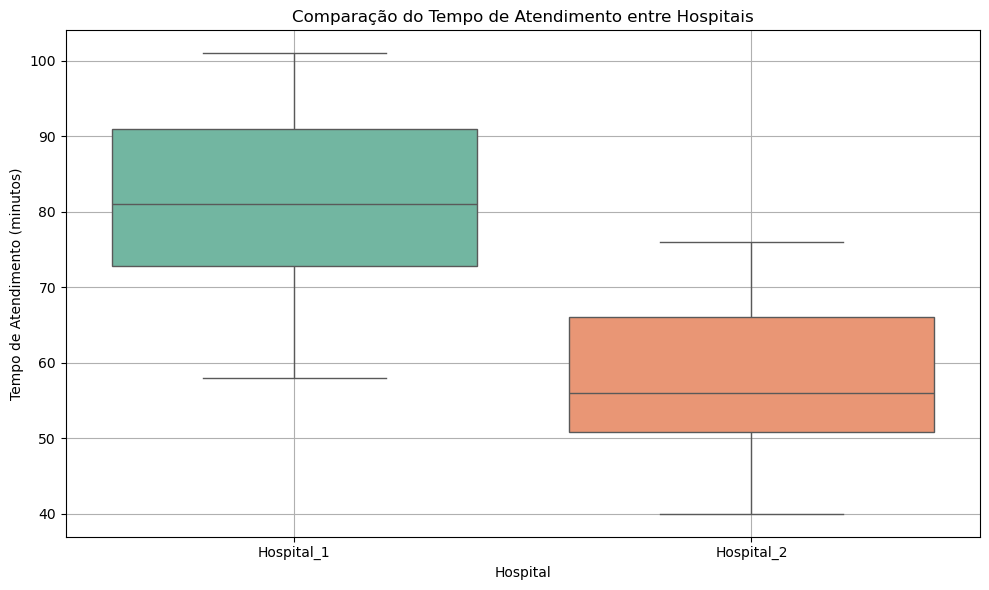

In [25]:
# Boxplot comparativo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hospitais, x='Hospital', y='Tempo_Atendimento', palette="Set2")
plt.title("Comparação do Tempo de Atendimento entre Hospitais")
plt.xlabel("Hospital")
plt.ylabel("Tempo de Atendimento (minutos)")
plt.grid(True)
plt.tight_layout()
plt.show()

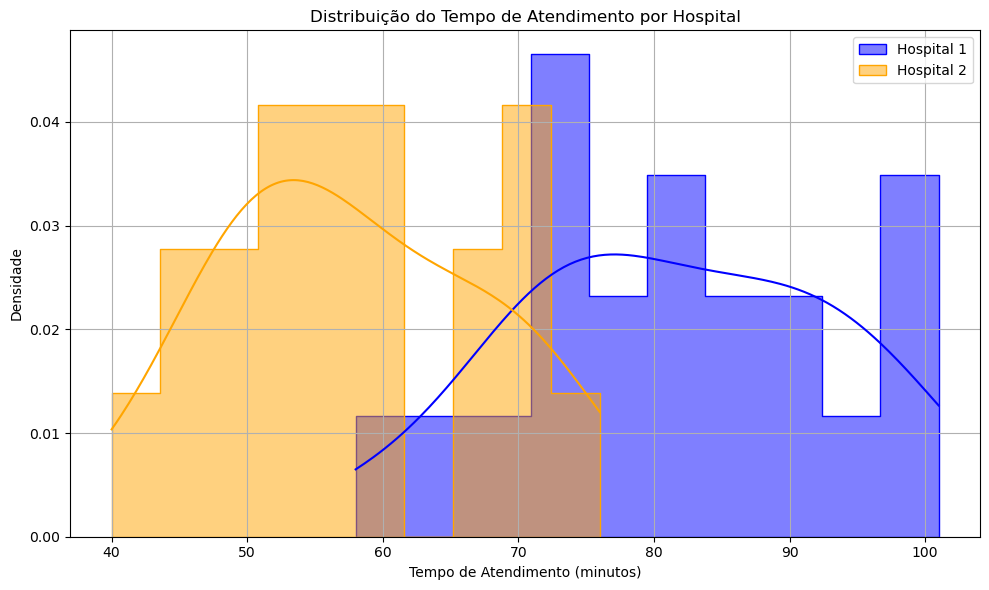

In [26]:
# Histograma comparativo
plt.figure(figsize=(10, 6))
sns.histplot(h1, color="blue", label="Hospital 1", kde=True, stat="density", element="step", bins=10)
sns.histplot(h2, color="orange", label="Hospital 2", kde=True, stat="density", element="step", bins=10)
plt.title("Distribuição do Tempo de Atendimento por Hospital")
plt.xlabel("Tempo de Atendimento (minutos)")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Exercicio 5
Trinta adolescentes com nível de colesterol total acima do permitido foram submetidos a um tratamento que consistia em dieta e atividade física. A planilha Colesterol.xlsx apresenta os índices de colesterol LDL (mg/dL) antes e depois do tratamento. Verifique se o tratamento é eficaz (com nível de significância de 5%).

In [27]:
df_colesterol = pd.read_excel("Colesterol.xlsx")
df_colesterol.head()

,ID,Antes_tratamento,Depois_tratamento
0,1,220,195
1,2,212,180
2,3,227,200
3,4,234,204
4,5,204,180


In [28]:
# Extrair as duas colunas relevantes
antes = df_colesterol["Antes_tratamento"]
depois = df_colesterol["Depois_tratamento"]

In [29]:
# Teste t pareado
t_stat, p_valor = ttest_rel(antes, depois)

In [30]:
# Nível de significância
alpha = 0.05
decisao = "Rejeita H₀: o tratamento foi eficaz." if p_valor < alpha else "Não rejeita H₀: não há evidência de eficácia do tratamento."

t_stat, p_valor, decisao

(11.953297138613197,
 9.960437580616326e-13,
 'Rejeita H₀: o tratamento foi eficaz.')

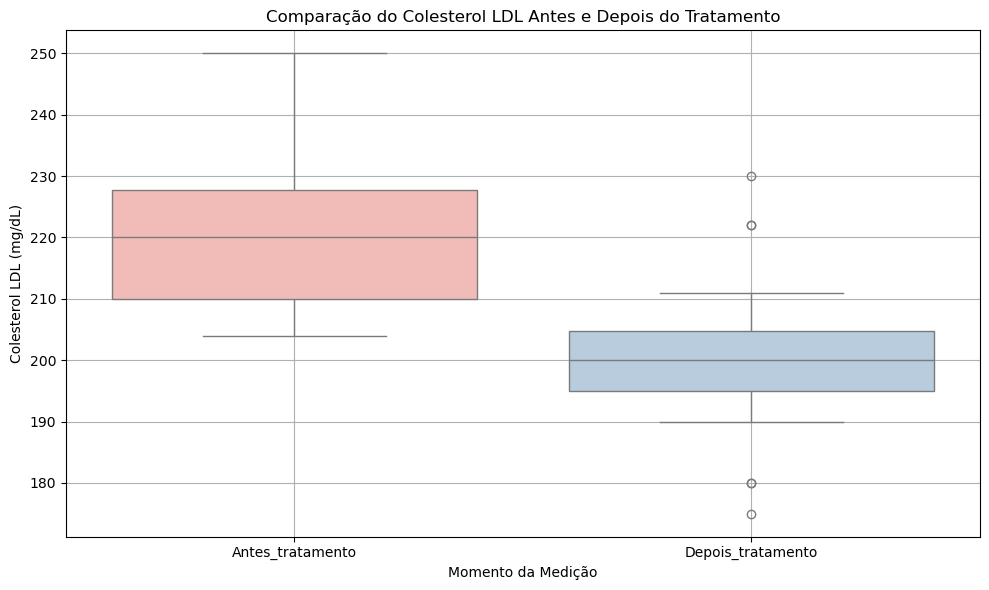

In [31]:
# Gráfico de boxplot comparando antes e depois do tratamento
plt.figure(figsize=(10, 6))
df_melted = df_colesterol.melt(id_vars='ID', value_vars=['Antes_tratamento', 'Depois_tratamento'],
                               var_name='Momento', value_name='Colesterol_LDL')

sns.boxplot(data=df_melted, x='Momento', y='Colesterol_LDL', palette='Pastel1')
plt.title("Comparação do Colesterol LDL Antes e Depois do Tratamento")
plt.xlabel("Momento da Medição")
plt.ylabel("Colesterol LDL (mg/dL)")
plt.grid(True)
plt.tight_layout()
plt.show()


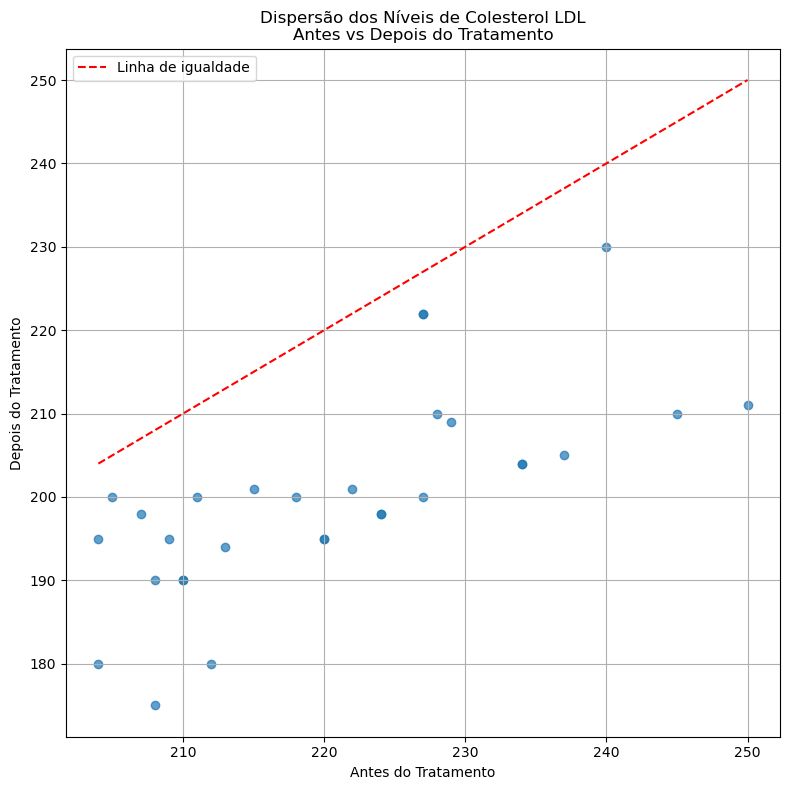

In [32]:
# Gráfico de dispersão com linha de identidade
plt.figure(figsize=(8, 8))
plt.scatter(antes, depois, alpha=0.7)
plt.plot([antes.min(), antes.max()], [antes.min(), antes.max()], 'r--', label='Linha de igualdade')
plt.title("Dispersão dos Níveis de Colesterol LDL\nAntes vs Depois do Tratamento")
plt.xlabel("Antes do Tratamento")
plt.ylabel("Depois do Tratamento")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Exercicio 6
Um grupo de 20 consumidores fez um teste de degustação com dois tipos de cerveja (Marca A e Marca B). Ao final, escolheram uma das marcas, como vemos a seguir. Teste a hipótese de não há diferença na preferência dos consumidores, ao nível de significância de 5%.
Eventos	Marca A	Marca B	Total
Frequência	8	12	20


In [33]:
# Dados do problema
n = 20        # total de consumidores
k = 8         # escolheram Marca A
p0 = 0.5      # hipótese nula: proporção esperada
alpha = 0.05  # nível de significância

In [34]:
# Teste binomial bicaudal
resultado_binom = binomtest(k, n=n, p=p0, alternative='two-sided')

In [35]:
resultado_binom

BinomTestResult(k=8, n=20, alternative='two-sided', statistic=0.4, pvalue=0.5034446716308594)

In [36]:
p_valor = resultado_binom.pvalue

decisao = "Rejeita H₀: há diferença na preferência." if p_valor < alpha else "Não rejeita H₀: não há evidência de diferença na preferência."

p_valor, decisao

(0.5034446716308594,
 'Não rejeita H₀: não há evidência de diferença na preferência.')

### Exercício 7
Um grupo de 60 leitores fez uma avaliação de três livros de romance e, ao final, escolheram uma das três opções. Teste a hipótese nula de que não há preferência dos leitores, com nível de significância de 5%

Eventos	Livro A	Livro B	Livro C	Total
Frequência	29	15	16	60


In [37]:
# Frequências observadas
observado = [29, 15, 16]

In [38]:
# Frequências esperadas sob H₀ (distribuição uniforme)
esperado = [60/3, 60/3, 60/3]

In [39]:
# Teste do qui-quadrado
chi2_stat, p_valor = chisquare(f_obs=observado, f_exp=esperado)

In [40]:
# Nível de significância
alpha = 0.05

In [41]:
# Interpretação
decisao = "Rejeita H₀: há preferência por pelo menos um dos livros." if p_valor < alpha else "Não rejeita H₀: não há evidência de preferência."

In [42]:
chi2_stat, p_valor, decisao

(6.1,
 0.04735892439114093,
 'Rejeita H₀: há preferência por pelo menos um dos livros.')

In [43]:
# extra
from itertools import combinations
from scipy.stats import fisher_exact
import pandas as pd

# Dados observados
frequencias = {'Livro A': 29, 'Livro B': 15, 'Livro C': 16}
total = sum(frequencias.values())

# Gerar todas as combinações de pares para testes post-hoc
comparacoes = list(combinations(frequencias.keys(), 2))

# Criar uma tabela para guardar os resultados
resultados_posthoc = []

for livro1, livro2 in comparacoes:
    obs1 = frequencias[livro1]
    obs2 = frequencias[livro2]
    outros1 = total - obs1
    outros2 = total - obs2
    
    # Construir tabela 2x2
    tabela = [[obs1, outros1],
              [obs2, outros2]]
    
    # Teste exato de Fisher (mais apropriado para amostras pequenas)
    _, pval = fisher_exact(tabela)
    resultados_posthoc.append({
        "Comparação": f"{livro1} vs {livro2}",
        "p-valor": pval
    })

# Transformar em DataFrame para exibição
df_resultados_posthoc = pd.DataFrame(resultados_posthoc)
df_resultados_posthoc.sort_values("p-valor", inplace=True)
df_resultados_posthoc 


,Comparação,p-valor
0,Livro A vs Livro B,0.013355
1,Livro A vs Livro C,0.023146
2,Livro B vs Livro C,1.000000


Aqui estão os resultados dos testes post-hoc pareados entre os livros:

Livro A teve preferência significativamente maior do que Livro B e Livro C.

Livro B e Livro C não apresentaram diferença significativa entre si.

### Exercício 8

Um grupo de 20 adolescentes fez a dieta dos pontos por um período de 1 mês. Verifique se houve redução de peso depois da dieta. Arquivo Dieta.xlsx. Considere nível de significância de 5%.

In [44]:
df_dieta = pd.read_excel("Dieta.xlsx")

# Exibir as primeiras linhas para entender a estrutura
df_dieta.head()

,Antes,Depois
0,58,56
1,67,62
2,72,65
3,88,84
4,77,72


In [45]:
# Extrair os dados de peso antes e depois da dieta
antes = df_dieta["Antes"]

depois = df_dieta["Depois"]

In [46]:
# Teste t pareado (bilateral)
t_stat, p_valor = ttest_rel(antes, depois)

In [47]:
# Nível de significância
alpha = 0.05
decisao = "Rejeita H₀: houve redução significativa de peso." if p_valor < alpha else "Não rejeita H₀: não há evidência de redução significativa."

In [48]:
t_stat, p_valor, decisao

(4.487848788616034,
 0.00025204021121150394,
 'Rejeita H₀: houve redução significativa de peso.')

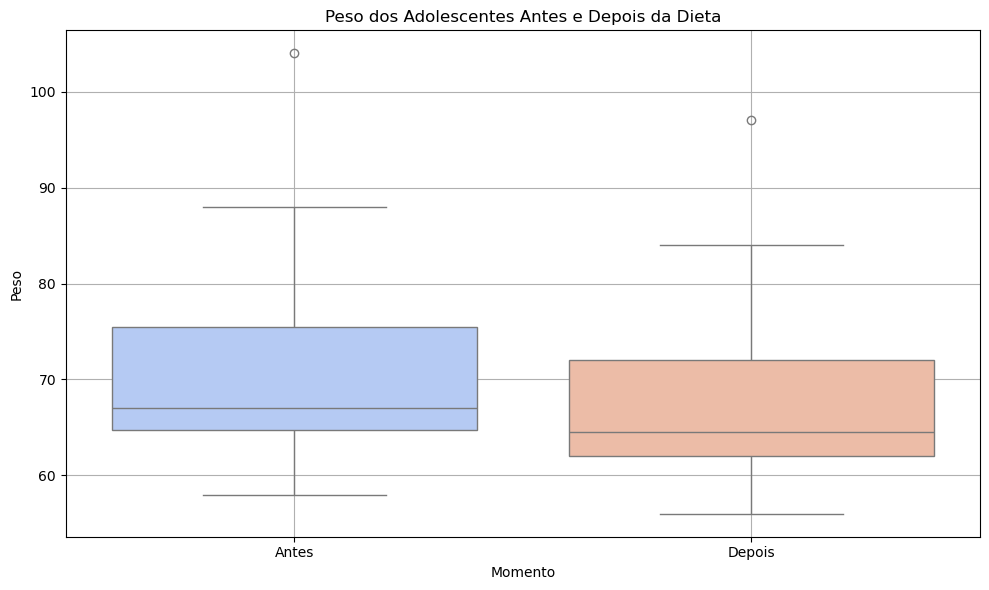

(3.2, (1.7075974504542355, 4.692402549545765))

In [49]:
#extra
# Preparar dados para boxplot
df_melted_dieta = df_dieta.melt(value_vars=["Antes", "Depois"], var_name="Momento", value_name="Peso")

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted_dieta, x="Momento", y="Peso", palette="coolwarm")
plt.title("Peso dos Adolescentes Antes e Depois da Dieta")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calcular intervalo de confiança da diferença média
dif = antes - depois
media_dif = np.mean(dif)
erro_padrao = stats.sem(dif)
ic = stats.t.interval(0.95, df=len(dif)-1, loc=media_dif, scale=erro_padrao)

media_dif, ic



### Exercício 9
Um grupo de 15 consumidores avaliou o nível de satisfação (1=baixo, 2=médio, 3=alto) de três serviços bancários diferentes. Os resultados estão na tabela Banco.xlsx. Verifique se há diferença entre os três serviços. Considere nível de significância de 5%.

In [50]:
df_banco = pd.read_excel("Banco.xlsx")

# Visualizar as primeiras linhas para entender a estrutura
df_banco.head()

,Consumidor,A,B,C
0,1,3,2,3
1,2,2,2,2
2,3,1,2,1
3,4,3,2,2
4,5,1,1,1


In [51]:
# Extraindo as colunas de avaliação dos três serviços
avaliacoes_A = df_banco['A']
avaliacoes_B = df_banco['B']
avaliacoes_C = df_banco['C']

In [52]:
# Teste de Friedman (para dados pareados e ordinais)
stat_friedman, p_valor = friedmanchisquare(avaliacoes_A, avaliacoes_B, avaliacoes_C)


In [53]:
# Nível de significância
alpha = 0.05
decisao = "Rejeita H₀: há diferença significativa entre os serviços." if p_valor < alpha else "Não rejeita H₀: não há diferença significativa entre os serviços."

stat_friedman, p_valor, decisao

(9.190476190476197,
 0.010099815776638058,
 'Rejeita H₀: há diferença significativa entre os serviços.')

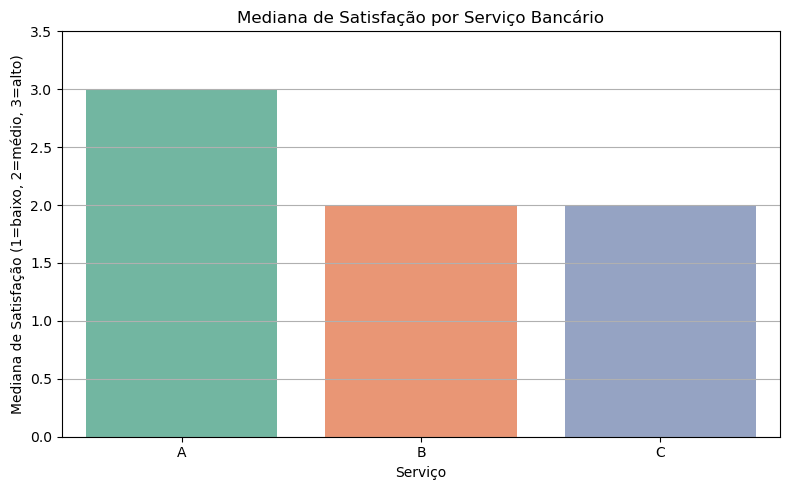

In [54]:
# Calcular a mediana de satisfação para cada serviço
medianas = df_banco[['A', 'B', 'C']].median().reset_index()
medianas.columns = ['Serviço', 'Mediana']

# Gerar gráfico de barras com as medianas
plt.figure(figsize=(8, 5))
sns.barplot(data=medianas, x='Serviço', y='Mediana', palette='Set2')
plt.title("Mediana de Satisfação por Serviço Bancário")
plt.ylabel("Mediana de Satisfação (1=baixo, 2=médio, 3=alto)")
plt.xlabel("Serviço")
plt.ylim(0, 3.5)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
